In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [7]:
data_set = pd.read_csv('SMSSpamCollection.csv', sep='\t' , names=['label','messages'])

In [8]:
data_set

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
data_set.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
data_set['label'] = data_set['label'].map({'ham':0,'spam':1})

In [13]:
data_set

,label,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

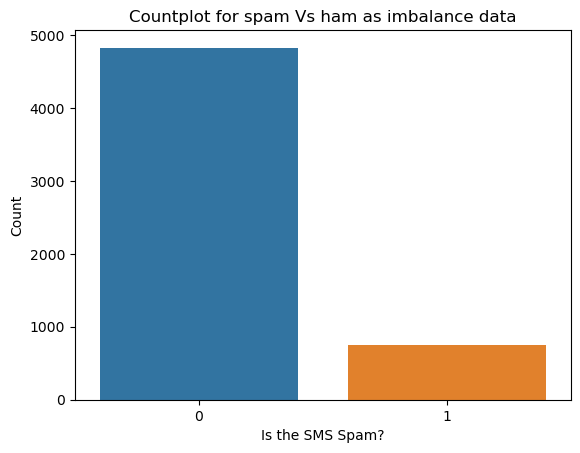

In [15]:
g = sns.countplot(x='label',data = data_set)
p = plt.title('Countplot for spam Vs ham as imbalance data')
p = plt.xlabel('Is the SMS Spam?')
p = plt.ylabel('Count')

In [17]:
only_spam = data_set[data_set['label'] ==1]

In [18]:
only_spam

,label,messages
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [19]:
len(data_set) - len(only_spam)

4825

In [20]:
print('No. of spam messages:',len(only_spam))
print('No. of ham messages:',len(data_set) - len(only_spam))

No. of spam messages: 747
No. of ham messages: 4825


In [21]:
count = int((data_set.shape[0] - only_spam.shape[0])/only_spam.shape[0])

In [22]:
count

6

In [23]:
for i in range(0 , count-1):
    data_set = pd.concat([data_set , only_spam])

In [24]:
data_set.shape

(9307, 2)

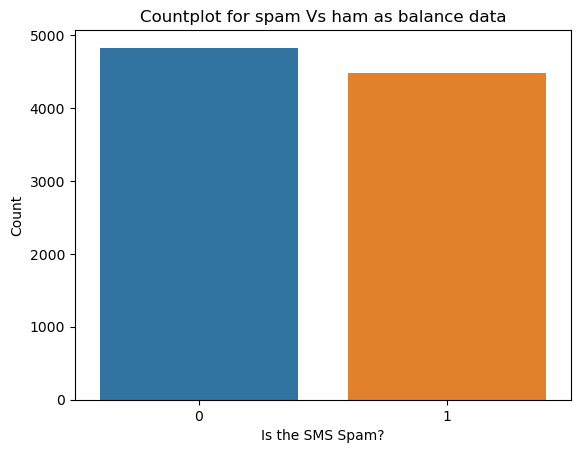

In [25]:
g = sns.countplot(x='label',data = data_set)
p = plt.title('Countplot for spam Vs ham as balance data')
p = plt.xlabel('Is the SMS Spam?')
p = plt.ylabel('Count')

In [26]:
data_set['word_count'] = data_set['messages'].apply(lambda x:len(x.split()))

In [27]:
data_set

,label,messages,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


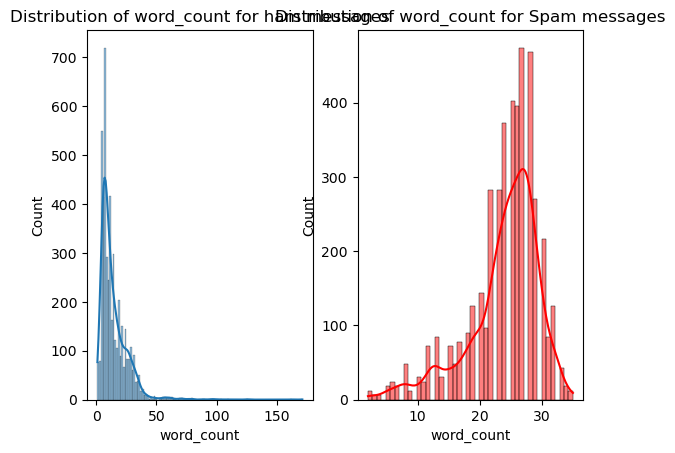

In [29]:
plt.subplot(1,2,1)
g = sns.histplot(data_set[data_set['label'] == 0].word_count , kde = True)
p = plt.title('Distribution of word_count for ham messages')

plt.subplot(1,2,2)
g = sns.histplot(data_set[data_set['label'] == 1].word_count ,color='red' , kde = True)
p = plt.title('Distribution of word_count for Spam messages')

In [33]:
def currency_present(data):
    currency_symbol = ['€' , '$' , '¥' , '₹' , '£']
    for i in currency_symbol:
        if i in data:
            return 1
    return 0

In [34]:
data_set['Contains_currency_symbol'] = data_set['messages'].apply(currency_present)

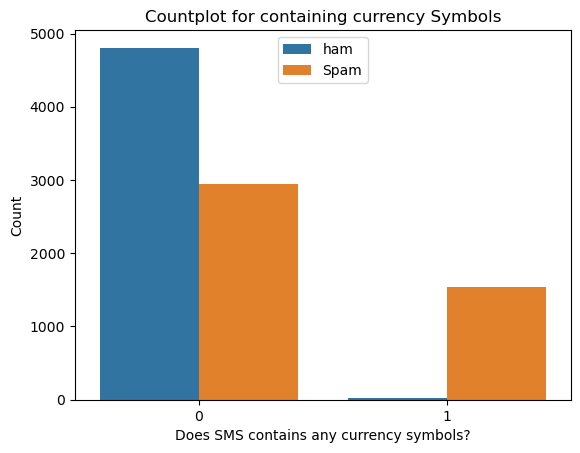

In [35]:
g = sns.countplot(x='Contains_currency_symbol' , data=data_set , hue='label')
p = plt.title('Countplot for containing currency Symbols')
p = plt.xlabel('Does SMS contains any currency symbols?')
p = plt.ylabel('Count')
p = plt.legend(labels = ['ham' , 'Spam'], loc = 9)

In [36]:
def number(data):
    for i in data:
        if ord(i) >=48 and ord(i) <= 57:
            return 1
    return 0

In [37]:
data_set['contain_numbers'] = data_set['messages'].apply(number)

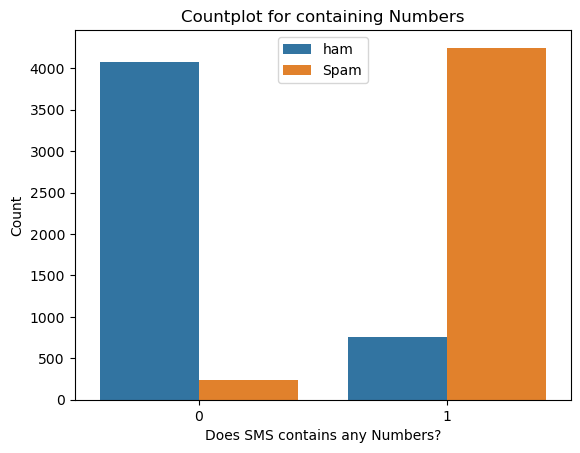

In [39]:
g = sns.countplot(x='contain_numbers' , data=data_set , hue='label')
p = plt.title('Countplot for containing Numbers')
p = plt.xlabel('Does SMS contains any Numbers?')
p = plt.ylabel('Count')
p = plt.legend(labels = ['ham' , 'Spam'], loc = 9)

In [41]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to C:\Users\Vaibhav
[nltk_data]     Jadhav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Vaibhav
[nltk_data]     Jadhav\AppData\Roaming\nltk_data...


In [44]:
corpus = []
wnl =WordNetLemmatizer()
for sms in list(data_set.messages):
    messages = re.sub(pattern='[^a-zA-Z]', repl=' ' , string = sms)
    messages = messages.lower()
    words = messages.split()
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    messages = ' '.join(lemm_words)
    
    corpus.append(messages)

In [45]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vector = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

In [48]:
X = pd.DataFrame(vector , columns=feature_names)
y = data_set['label']

In [49]:
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
X_train

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
8272,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.349944,0.0,0.0,0.0
8451,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4042,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1514,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2313,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [54]:
from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB()
cv = cross_val_score(mb , X , y, scoring='f1' ,cv = 10 )
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.943
0.004


In [55]:
mb.fit(X_train , y_train)
y_pred = mb.predict(X_test)

In [57]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1596
           1       0.94      0.95      0.94      1476

    accuracy                           0.94      3072
   macro avg       0.94      0.94      0.94      3072
weighted avg       0.94      0.94      0.94      3072



In [60]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[1504,   92],
       [  81, 1395]], dtype=int64)

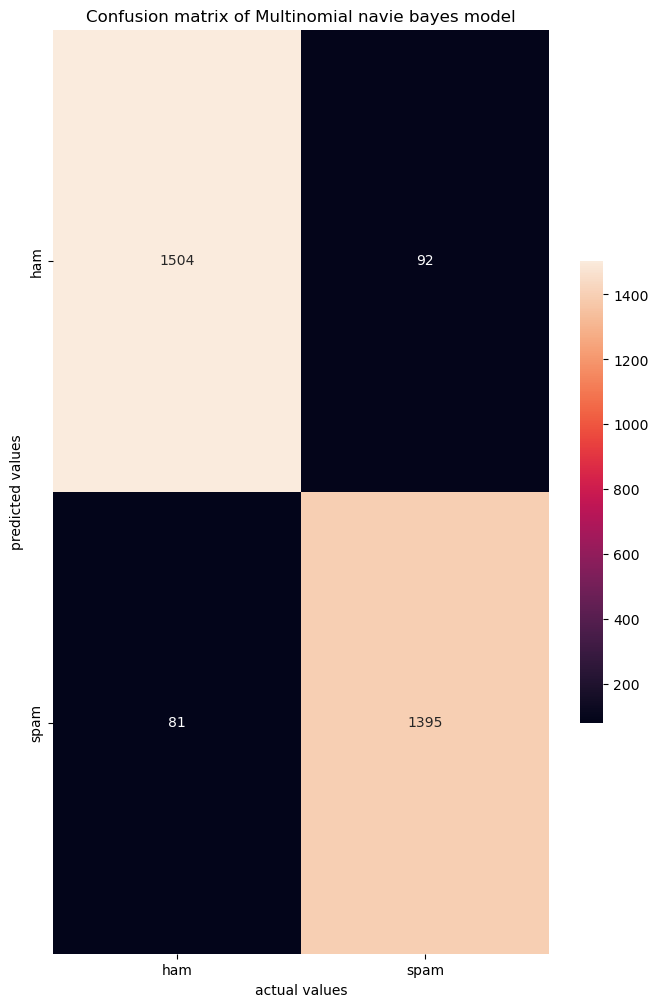

In [62]:
axis_labels = ['ham' , 'spam']
plt.figure(figsize=(8,12))
sns.heatmap(data=cm , xticklabels=axis_labels , yticklabels=axis_labels , annot = True ,fmt = 'g' ,cbar_kws= {'shrink':0.5} )
p = plt.title('Confusion matrix of Multinomial navie bayes model')
p = plt.xlabel('actual values')
p = plt.ylabel('predicted values')

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv1 = cross_val_score(dt ,X , y, scoring='f1' , cv=10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))

0.98
0.004


In [64]:
dt.fit(X_train , y_train)
y_pred1 = dt.predict(X_test)

In [65]:
print(classification_report(y_test , y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1596
           1       0.96      0.99      0.98      1476

    accuracy                           0.98      3072
   macro avg       0.98      0.98      0.98      3072
weighted avg       0.98      0.98      0.98      3072



In [66]:
cm = confusion_matrix(y_test , y_pred1)
cm

array([[1540,   56],
       [  11, 1465]], dtype=int64)

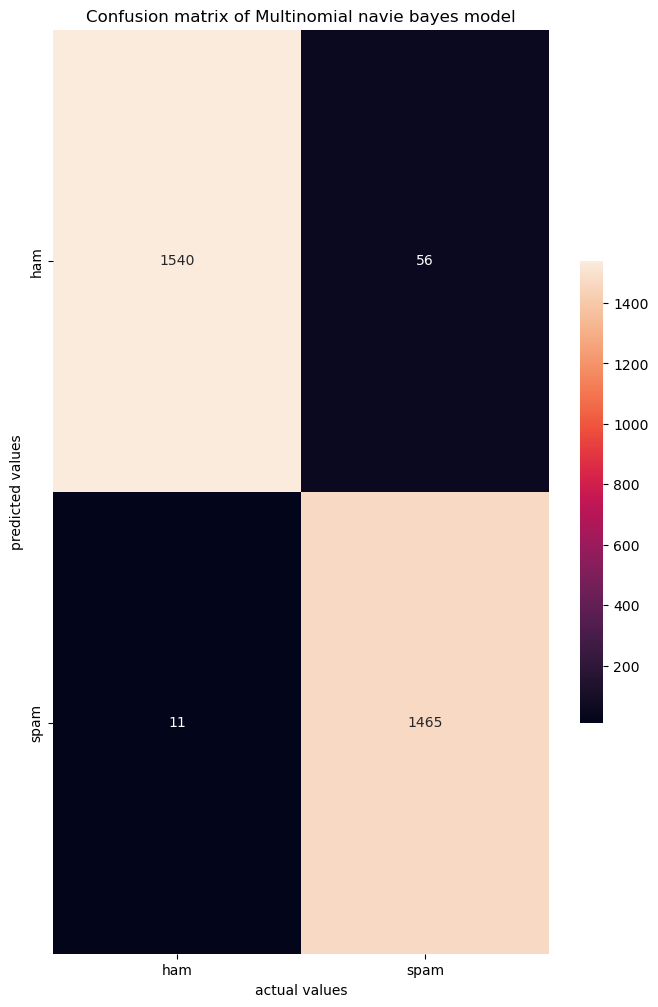

In [67]:
axis_labels = ['ham' , 'spam']
plt.figure(figsize=(8,12))
sns.heatmap(data=cm , xticklabels=axis_labels , yticklabels=axis_labels , annot = True ,fmt = 'g' ,cbar_kws= {'shrink':0.5} )
p = plt.title('Confusion matrix of Multinomial navie bayes model')
p = plt.xlabel('actual values')
p = plt.ylabel('predicted values')

In [73]:
def predict_spam(sms):
    messages = re.sub(pattern='[^a-zA-Z]', repl=' ' , string = sms)
    messages = messages.lower()
    words = messages.split()
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    messages = ' '.join(lemm_words)
    temp = tfidf.transform([messages]).toarray()
    return dt.predict(temp)

In [74]:
sample_message = "You've won a prize!"
if predict_spam(sample_message):
    print("This is a spam message")
else:
    print("This is ham message")

This is a spam message


C:\Users\Vaibhav Jadhav\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
